In [173]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [174]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [175]:
whisky = pd.read_csv('whisky.csv')

In [176]:
whisky

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140
5,6,ArranIsleOf,2,3,1,1,0,1,1,1,0,1,1,2,KA27 8HJ,194050,649950
6,7,Auchentoshan,0,2,0,0,0,1,1,0,2,2,3,3,G81 4SJ,247670,672610
7,8,Auchroisk,2,3,1,0,0,2,1,2,2,2,2,1,\tAB55 3XS,340754,848623
8,9,Aultmore,2,2,1,0,0,1,0,0,2,2,2,2,\tAB55 3QY,340754,848623
9,10,Balblair,2,3,2,1,0,0,2,0,2,1,2,1,\tIV19 1LB,270820,885770


In [177]:
whisky.columns

Index(['RowID', 'Distillery', 'Body', 'Sweetness', 'Smoky', 'Medicinal',
       'Tobacco', 'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity',
       'Floral', 'Postcode', 'Latitude', 'Longitude'],
      dtype='object')

In [178]:
whisky = whisky[['RowID','Distillery', 'Body', 'Sweetness', 'Smoky', 'Medicinal',
       'Tobacco', 'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity',
       'Floral', 'Postcode', 'Latitude', 'Longitude']]

In [179]:
whisky

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140
5,6,ArranIsleOf,2,3,1,1,0,1,1,1,0,1,1,2,KA27 8HJ,194050,649950
6,7,Auchentoshan,0,2,0,0,0,1,1,0,2,2,3,3,G81 4SJ,247670,672610
7,8,Auchroisk,2,3,1,0,0,2,1,2,2,2,2,1,\tAB55 3XS,340754,848623
8,9,Aultmore,2,2,1,0,0,1,0,0,2,2,2,2,\tAB55 3QY,340754,848623
9,10,Balblair,2,3,2,1,0,0,2,0,2,1,2,1,\tIV19 1LB,270820,885770


In [180]:
whisky['Body'].value_counts()

2    45
1    19
3    11
4     9
0     2
Name: Body, dtype: int64

In [181]:
whisky.shape

(86, 17)

In [182]:
whisky.describe()

,RowID,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Latitude,Longitude
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,8.600000e+01
mean,43.500000,2.069767,2.290698,1.534884,0.546512,0.116279,1.244186,1.383721,0.976744,1.465116,1.802326,1.802326,1.697674,287247.162791,8.026597e+05
std,24.969982,0.930410,0.717287,0.863613,0.990032,0.322439,0.853175,0.784686,0.932760,0.821730,0.629094,0.779438,0.855017,67889.046814,8.802422e+04
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126680.000000,5.542600e+05
25%,22.250000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,265672.500000,7.556975e+05
50%,43.500000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,319515.000000,8.398850e+05
75%,64.750000,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,328630.000000,8.507700e+05
max,86.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,381020.000000,1.009260e+06


In [183]:
whisky.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   RowID       86 non-null     int64 
 1   Distillery  86 non-null     object
 2   Body        86 non-null     int64 
 3   Sweetness   86 non-null     int64 
 4   Smoky       86 non-null     int64 
 5   Medicinal   86 non-null     int64 
 6   Tobacco     86 non-null     int64 
 7   Honey       86 non-null     int64 
 8   Spicy       86 non-null     int64 
 9   Winey       86 non-null     int64 
 10  Nutty       86 non-null     int64 
 11  Malty       86 non-null     int64 
 12  Fruity      86 non-null     int64 
 13  Floral      86 non-null     int64 
 14  Postcode    86 non-null     object
 15  Latitude    86 non-null     int64 
 16  Longitude   86 non-null     int64 
dtypes: int64(15), object(2)
memory usage: 11.5+ KB


In [184]:
whisky.isnull().sum()

RowID         0
Distillery    0
Body          0
Sweetness     0
Smoky         0
Medicinal     0
Tobacco       0
Honey         0
Spicy         0
Winey         0
Nutty         0
Malty         0
Fruity        0
Floral        0
Postcode      0
Latitude      0
Longitude     0
dtype: int64

In [185]:
# Calculando a correlação entre as colunas do dataset
whisky.corr().style.format('{:.6}').background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,RowID,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Latitude,Longitude
RowID,1.0,-0.102798,0.0403966,-0.115659,0.0292677,0.115436,-0.147171,0.00570415,0.00101024,-0.0527499,-0.136682,-0.126638,-0.135006,0.0428652,0.152611
Body,-0.102798,1.0,-0.136518,0.524032,0.35405,0.168718,0.0820308,0.1885,0.408576,0.126323,-0.116859,-0.0132046,-0.461203,-0.166857,0.0544794
Sweetness,0.0403966,-0.136518,1.0,-0.405897,-0.392017,-0.147871,0.132558,-0.0541999,0.115727,-0.0324929,-0.00151581,0.0198195,0.144987,0.430832,0.306596
Smoky,-0.115659,0.524032,-0.405897,1.0,0.686071,0.365501,-0.195318,0.231745,-0.0281904,-0.0231321,-0.192875,-0.31297,-0.431663,-0.435433,-0.174985
Medicinal,0.0292677,0.35405,-0.392017,0.686071,1.0,0.425106,-0.396629,0.0449032,-0.202651,-0.113671,-0.258959,-0.330975,-0.511323,-0.67045,-0.335721
Tobacco,0.115436,0.168718,-0.147871,0.365501,0.425106,1.0,-0.27549,0.0540678,0.00909693,-0.117717,-0.0593474,-0.235145,-0.212375,-0.0944997,-0.071675
Honey,-0.147171,0.0820308,0.132558,-0.195318,-0.396629,-0.27549,1.0,0.139563,0.362021,0.188492,0.310184,0.108822,0.183029,0.222169,0.158981
Spicy,0.00570415,0.1885,-0.0541999,0.231745,0.0449032,0.0540678,0.139563,1.0,0.092704,-0.0428558,0.036303,0.144714,0.0346626,-0.0169989,0.0493375
Winey,0.00101024,0.408576,0.115727,-0.0281904,-0.202651,0.00909693,0.362021,0.092704,1.0,0.198467,0.112368,0.0906939,-0.126932,0.227778,0.0800753
Nutty,-0.0527499,0.126323,-0.0324929,-0.0231321,-0.113671,-0.117717,0.188492,-0.0428558,0.198467,1.0,0.0661574,0.0717648,0.0183024,0.0548633,0.0673329


In [186]:
# Contando o número de vezes que cada categoria da variável aparece

# criando as variáveis contagem e percentual que serão inseridas em um dataframe para facilitar a visualização
contagem_categoria = whisky['Postcode'].value_counts()
percentual_categoria = (whisky['Postcode'].value_counts(normalize=True) * 100).round(1)

# criando o dataframe que apresenta o número absoluto e os percentuais de cada faixa etária
dados_categoria = pd.DataFrame()
dados_categoria['Número absoluto'] = contagem_categoria
dados_categoria['Percentual'] = percentual_categoria
dados_categoria

,Número absoluto,Percentual
IV30 3SS,2,2.3
AB37 9AQ,1,1.2
IV30 3SL,1,1.2
KW1 5BA,1,1.2
AB30 1YE,1,1.2
AB37 9JA,1,1.2
\tAB55 3QY,1,1.2
PH7 4HA,1,1.2
AB38 9RX,1,1.2
\tPA46 7RL,1,1.2


In [187]:
(pd.crosstab(whisky['Distillery'], whisky['Postcode'],normalize='index')).round(1)

Postcode,\tAB38 7RE,\tAB38 7RY,\tAB38 9NN,\tAB38 9PJ,\tAB5 5LI,\tAB54 4NH,\tAB55 3QY,\tAB55 3XS,\tAB55 4DH,\tDG8 9AB,\tIV17 0UT,\tIV19 1LB,\tIV30 8SJ,\tIV36 3EB,\tKW9 6LB,\tPA42 7EB,\tPA43 7GS,\tPA46 7RL,\tPH15 2EB,\tPH16 5LY,\tPH19 1AB,\tPH26 3PF,\tPH33 6TJ,AB30 1YE,AB35 5TB,AB37 9AB,AB37 9AQ,AB37 9BD,AB37 9DB,AB37 9JA,AB38 7AA,AB38 7AG,AB38 7AU,AB38 7BS,AB38 7RP,AB38 7RT,AB38 9LR,AB38 9RX,AB38 9ST,AB4 3JT,AB51 0ES,AB54 6DA,AB55 3BS,AB55 3BU,AB55 4AQ,AB55 4BR,AB55 4DH,AB55 4DJ,AB55 5DQ,AB56 5AB,EH34 5ET,FK16 6AG,G63 9LB,G81 4SJ,G83 0TL,IV12 5QY,IV13 7YT,IV17 0XB,IV19 1PZ,IV30 1YE,IV30 3RD,IV30 3SJ,IV30 3SL,IV30 3SS,IV30 3TQ,IV47 8SR,IV6 7UJ,KA27 8HJ,KW1 5BA,KW15 1SE,KW15 1SU,PA28 6DS,PA28 6EJ,PA34 5NH,PA42 7DU,PA42 7DZ,PA46 7RR,PA49 7UN,PA60 7XT,PA75 6NR,PH16 5JP,PH21 1NS,PH26 3LR,PH4 1QG,PH7 4HA
Distillery,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aberfeldy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aberlour,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AnCnoc,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ardbeg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ardmore,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ArranIsleOf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Auchentoshan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Auchroisk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aultmore,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [188]:
whisky.columns

Index(['RowID', 'Distillery', 'Body', 'Sweetness', 'Smoky', 'Medicinal',
       'Tobacco', 'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity',
       'Floral', 'Postcode', 'Latitude', 'Longitude'],
      dtype='object')

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = whisky[['Body', 'Sweetness', 'Smoky', 'Medicinal',
       'Tobacco', 'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity',
       'Floral']]
df

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,2,2,2,0,0,2,1,2,2,2,2,2
1,3,3,1,0,0,4,3,2,2,3,3,2
2,1,3,2,0,0,2,0,0,2,2,3,2
3,4,1,4,4,0,0,2,0,1,2,1,0
4,2,2,2,0,0,1,1,1,2,3,1,1
5,2,3,1,1,0,1,1,1,0,1,1,2
6,0,2,0,0,0,1,1,0,2,2,3,3
7,2,3,1,0,0,2,1,2,2,2,2,1
8,2,2,1,0,0,1,0,0,2,2,2,2
9,2,3,2,1,0,0,2,0,2,1,2,1


In [190]:
clustering_kmeans = KMeans(n_clusters=3, precompute_distances="auto", n_jobs=-1)

In [191]:
clustering_kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [192]:
whisky['clusters'] = clustering_kmeans.fit_predict(df)

In [193]:
whisky

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,clusters
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,2
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,2
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,0
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,1
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,2
5,6,ArranIsleOf,2,3,1,1,0,1,1,1,0,1,1,2,KA27 8HJ,194050,649950,0
6,7,Auchentoshan,0,2,0,0,0,1,1,0,2,2,3,3,G81 4SJ,247670,672610,0
7,8,Auchroisk,2,3,1,0,0,2,1,2,2,2,2,1,\tAB55 3XS,340754,848623,2
8,9,Aultmore,2,2,1,0,0,1,0,0,2,2,2,2,\tAB55 3QY,340754,848623,0
9,10,Balblair,2,3,2,1,0,0,2,0,2,1,2,1,\tIV19 1LB,270820,885770,0


In [194]:
whisky[whisky['clusters'] == 0].describe()

,RowID,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Latitude,Longitude,clusters
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.00000,41.000000,41.000000,41.0
mean,46.585366,1.487805,2.463415,1.121951,0.268293,0.073171,0.926829,1.146341,0.512195,1.146341,1.658537,1.878049,2.00000,301304.829268,808877.951220,0.0
std,25.440102,0.596739,0.744901,0.599797,0.448575,0.263652,0.685210,0.823437,0.596739,0.823437,0.529611,0.780869,0.67082,52211.180933,79547.388522,0.0
min,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,142210.000000,554260.000000,0.0
25%,29.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,2.00000,276750.000000,800600.000000,0.0
50%,46.000000,2.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.00000,321180.000000,841760.000000,0.0
75%,70.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.00000,327760.000000,860400.000000,0.0
max,86.000000,2.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,4.00000,381020.000000,885770.000000,0.0


In [195]:
whisky[whisky['clusters'] == 1].describe()

,RowID,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Latitude,Longitude,clusters
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0000,11.0
mean,50.181818,2.909091,1.545455,2.909091,2.727273,0.454545,0.454545,1.454545,0.545455,1.545455,1.454545,1.181818,0.545455,182862.727273,721130.0000,1.0
std,24.322081,0.943880,0.522233,0.943880,0.904534,0.522233,0.687552,0.934199,0.687552,0.522233,0.522233,0.750757,0.687552,67400.314256,118727.4152,0.0
min,4.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,137950.000000,620910.0000,1.0
25%,32.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,140995.000000,645445.0000,1.0
50%,58.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2.000000,1.000000,1.000000,0.000000,152660.000000,667040.0000,1.0
75%,68.000000,4.000000,2.000000,4.000000,3.500000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,179110.000000,780980.0000,1.0
max,78.000000,4.000000,2.000000,4.000000,4.000000,1.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,336730.000000,950130.0000,1.0


In [196]:
whisky[whisky['clusters'] == 2].describe()

,RowID,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Latitude,Longitude,clusters
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,3.400000e+01,34.0
mean,37.617647,2.500000,2.323529,1.588235,0.176471,0.058824,1.882353,1.647059,1.676471,1.823529,2.088235,1.911765,1.705882,304066.705882,8.215384e+05,2.0
std,24.080691,0.825723,0.588814,0.608906,0.458627,0.238833,0.640299,0.597081,0.911894,0.757611,0.668225,0.712131,0.798841,54968.877349,7.338314e+04,0.0
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126680.000000,6.597200e+05,2.0
25%,16.500000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,288650.000000,7.803750e+05,2.0
50%,35.500000,2.000000,2.000000,2.000000,0.000000,0.000000,2.000000,2.000000,1.500000,2.000000,2.000000,2.000000,2.000000,323080.000000,8.401100e+05,2.0
75%,56.250000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,332882.500000,8.476998e+05,2.0
max,83.000000,4.000000,4.000000,3.000000,2.000000,1.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,370860.000000,1.009260e+06,2.0


In [197]:
 whisky[whisky['clusters'] == 0]

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,clusters
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,0
5,6,ArranIsleOf,2,3,1,1,0,1,1,1,0,1,1,2,KA27 8HJ,194050,649950,0
6,7,Auchentoshan,0,2,0,0,0,1,1,0,2,2,3,3,G81 4SJ,247670,672610,0
8,9,Aultmore,2,2,1,0,0,1,0,0,2,2,2,2,\tAB55 3QY,340754,848623,0
9,10,Balblair,2,3,2,1,0,0,2,0,2,1,2,1,\tIV19 1LB,270820,885770,0
13,14,Benriach,2,2,1,0,0,2,2,0,0,2,3,2,\tIV30 8SJ,323450,858380,0
16,17,Bladnoch,1,2,1,0,0,0,1,1,0,2,2,3,\tDG8 9AB,242260,554260,0
20,21,Bunnahabhain,1,2,1,1,0,1,1,1,1,2,2,3,PA46 7RR,142210,673170,0
22,23,Cardhu,1,3,1,0,0,1,1,0,2,2,2,2,\tAB38 7RY,318790,843090,0
25,26,Craigganmore,2,3,2,1,0,0,1,0,2,2,2,2,AB37 9AB,316600,836370,0


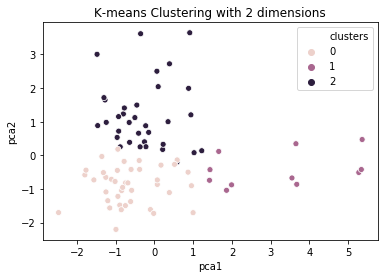

In [198]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pca_num_components = 2
reduced_data = PCA(n_components=pca_num_components).fit_transform(df)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])





sns.scatterplot(x="pca1", y="pca2", hue=whisky['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

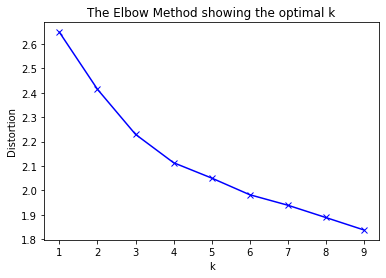

In [199]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df.values)
    kmeanModel.fit(df.values)
    distortions.append(sum(np.min(cdist(df.values, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.values.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()